# Pembuatan Basic dalam Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt


### Data X dan Y

In [5]:
panjang_data = 100

data_y = np.array([i * 0.1+ np.random.randn() for i in range(panjang_data)])
data_x = np.array([i*0.1 for i in range(panjang_data)])

### fungsi linear regresi

In [17]:
def linear_regresi(x, gradien):
    y = gradien*x
    return y

#### melakukan perhitungan linear awal

In [20]:
x_prediksi = np.array([0, 10])
m_prediksi = 5
y_prediksi = linear_regresi(x_prediksi, m_prediksi)

#### menampilkan data

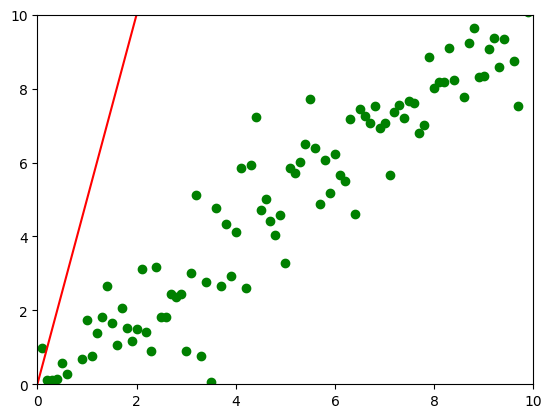

In [22]:
# scatter itu adalah mengatur / menambahkan data berupa titik
plt.scatter(data_x, data_y, color="green")
plt.plot(x_prediksi, y_prediksi, color="red")

# minX, maxX, minY, maxY
plt.axis([0,10,0,10])
plt.show()